<a href="https://colab.research.google.com/github/Shubham080997/Capstone-Project---1-EDA-on-Play-Store-Apps-Rating/blob/main/App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Week 4/Day 3/Play Store Data.csv'
apps_df = pd.read_csv(working_dir)

In [ ]:
working_dirt = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Week 4/Day 3/User Reviews.csv'
app_df = pd.read_csv(working_dirt)

In [ ]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
app_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
merge_data = pd.merge(left=apps_df, right=app_df, on="App").copy()

merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  object 
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

Filtering of Reviews: As it contains a lot of null values.

In [ ]:
# Dropping the missing data
app_df.dropna(inplace=True)
app_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
# Drop the missing data
app_df.dropna(inplace=True)

# Drop the column which won't be used
app_df.drop("Translated_Review", axis=1, inplace=True)

# Rename the remaining columns
app_df.columns = ["App", "Sentiment", "Polarity", "Subjectivity"]



In [ ]:
# Obtaining the mean for each app 
app_df_mean = app_df.groupby("App").mean().copy()

app_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 10 Best Foods for You to Housing-Real Estate & Property
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Polarity      865 non-null    float64
 1   Subjectivity  865 non-null    float64
dtypes: float64(2)
memory usage: 20.3+ KB


In [ ]:
# Printing the total number of unique categories
num_categories = len(merge_data['Category'].unique())
print('Number of categories = ', num_categories)

# Counting the total number of apps and then sorting
num_apps_in_category = merge_data['Category'].value_counts().sort_values(ascending =False)

plots = [go.Bar(
        x = num_apps_in_category.index, # here index = category name
        y = num_apps_in_category.values, #here value = count
)]



Number of categories =  33


In [ ]:
# Getting the unique values
merge_data.Sentiment.unique()

array(['Negative', 'Neutral', 'nan', 'Positive'], dtype=object)

In [ ]:
app_df_mean = app_df.groupby("App").mean().copy()

app_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 10 Best Foods for You to Housing-Real Estate & Property
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Polarity      865 non-null    float64
 1   Subjectivity  865 non-null    float64
dtypes: float64(2)
memory usage: 20.3+ KB


In [ ]:
app_df_mean

,Polarity,Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.185943,0.455340
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.101622,0.545444
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
Hotstar,0.038178,0.493964


In [ ]:
merge_data['Sentiment'] = merge_data['Sentiment'].astype(str)

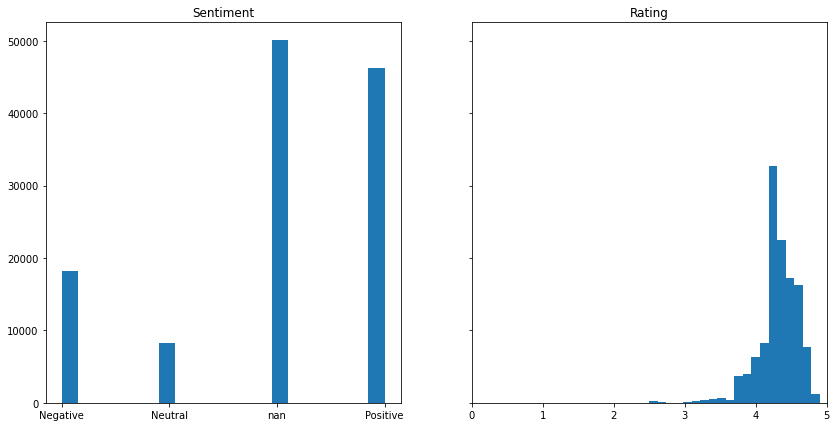

In [ ]:
# Creating the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)

# Creating the histograms
ax[0].hist(merge_data.Sentiment,bins=20)
ax[1].hist(merge_data.Rating, bins=20)
ax[1].set_xlim(0, 5)

# Adding the titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

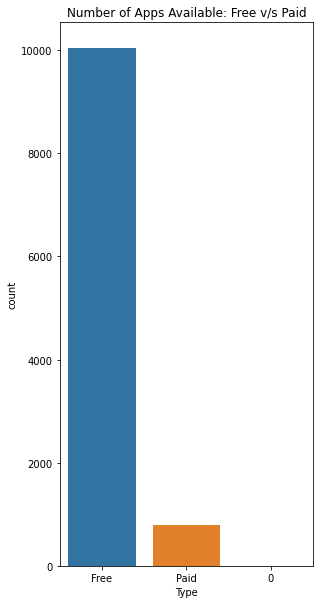

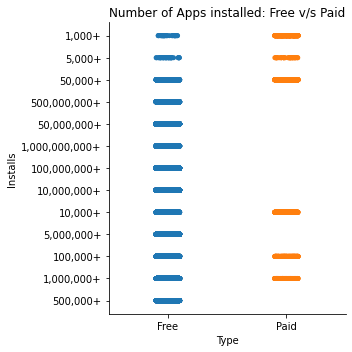

In [ ]:
#Number of free and paid Apps available
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.countplot(x='Type',data=apps_df)
plt.title("Number of Apps Available: Free v/s Paid")

#Most installed apps based on Category

sns.catplot(x='Type',y='Installs',data=merge_data,ci=None)
plt.title("Number of Apps installed: Free v/s Paid")
plt.tight_layout()


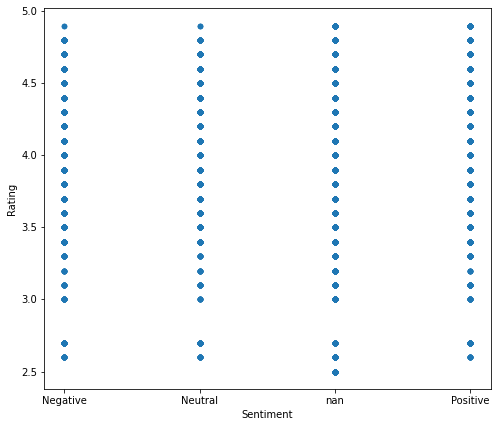

In [ ]:
# Plotting the scatter graph
merge_data.plot("Sentiment", "Rating", kind="scatter", figsize=(8, 7))
plt.show()

In [ ]:
# Separate by Type
free = apps_df.loc[apps_df.Type == "Free"].copy()
paid = apps_df.loc[apps_df.Type == "Paid"].copy()

# Obtain the means
free_mean = free.Rating.mean()
paid_mean = paid.Rating.mean()
print(free_mean)
print(paid_mean)


4.186202546163562
4.266615146831529


In [ ]:
merge_data['Rating'] = merge_data['Rating'].astype(str)
merge_data['Size'] = merge_data['Size'].astype(str)


In [ ]:
price_unique = merge_data.Price.unique()

array(['0', '$6.99', '$1.99', '$4.99', '$3.99', '$2.99', '$11.99',
       '$9.99', '$7.99', '$33.99', '$3.95', '$29.99', '$2.49', '$0.99'],
      dtype=object)

,Category,App,Price


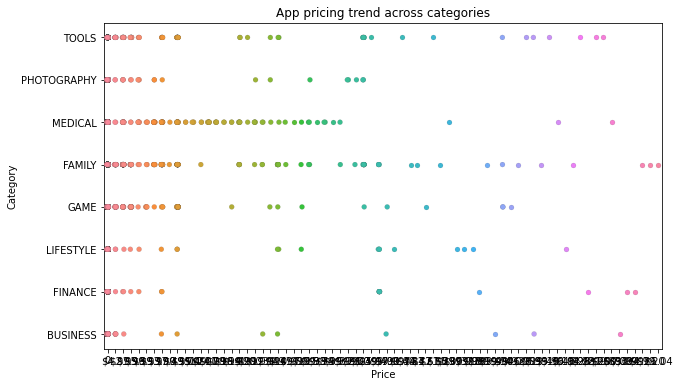

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

# Select a few popular app categories
popular_app = apps_df[apps_df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app['Price'], y = popular_app['Category'], jitter=True, linewidth=0.1)
ax.set_title('App pricing trend across categories')

# Apps which has greater than 50 dollars
apps_above_500 = popular_app[['Category', 'App', 'Price']][popular_app['Price'] > '50$']
apps_above_500

Here I have tried vizualizing various parameters and concept which affect the app engagement and I do think that the Sentimental aspect plays a crucial role in it.
We can drew various insights when we copared free vs paid apps as well. This comparison can also give us a clear picture of what the current demand is and accordingly what should be the approach from the supply side as well.